In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import csv
import pandas as pd
from datetime import datetime
import pytz 
from fake_useragent import UserAgent
import re

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

In [3]:
data = pd.read_csv('final_merged_data.csv')

In [4]:
data.columns

Index(['Geographic Area Name',
       'Estimate!!Percent below poverty level!!Population for whom poverty status is determined',
       'Geographic Area Name_x', 'Area_Type', 'Tract_x', 'Plurality Race',
       'Tract_y', ' !!Total:!!Population of one race:!!White alone_PROPORTION',
       ' !!Total:!!Population of one race:!!Black or African American alone_PROPORTION',
       ' !!Total:!!Population of one race:!!American Indian and Alaska Native alone_PROPORTION',
       ' !!Total:!!Population of one race:!!Asian alone_PROPORTION',
       ' !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone_PROPORTION',
       ' !!Total:!!Population of one race:!!Some Other Race alone_PROPORTION',
       'FIPS Code 2020', 'California Census tracts',
       'Number of people in state prison from each Census tract 2020',
       'Census population, 2020', 'Total population, 2020',
       'Imprisonment rate per 100,000', 'Geographic Area Name_y',
       'Estimate!!Total!!P

In [5]:
predictors = data[['Census population, 2020','Plurality Race','Estimate!!Total!!Population 16 years and over!!AGE!!16 to 19 years','Imprisonment rate per 100,000','Estimate!!Unemployment rate!!Population 16 years and over', ' !!Total:!!Population of one race:!!White alone_PROPORTION',' !!Total:!!Population of one race:!!Black or African American alone_PROPORTION',' !!Total:!!Population of one race:!!American Indian and Alaska Native alone_PROPORTION',' !!Total:!!Population of one race:!!Asian alone_PROPORTION',' !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone_PROPORTION',' !!Total:!!Population of one race:!!Some Other Race alone_PROPORTION', 'Area_Type', 'Estimate!!Percent below poverty level!!Population for whom poverty status is determined', 'Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years', 'Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Less than high school graduate', 'Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!High school graduate (includes equivalency)', "Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Some college or associate's degree", "Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Bachelor's degree or higher"]].copy()

In [6]:
predictors


,"Census population, 2020",Plurality Race,Estimate!!Total!!Population 16 years and over!!AGE!!16 to 19 years,"Imprisonment rate per 100,000",Estimate!!Unemployment rate!!Population 16 years and over,!!Total:!!Population of one race:!!White alone_PROPORTION,!!Total:!!Population of one race:!!Black or African American alone_PROPORTION,!!Total:!!Population of one race:!!American Indian and Alaska Native alone_PROPORTION,!!Total:!!Population of one race:!!Asian alone_PROPORTION,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone_PROPORTION,!!Total:!!Population of one race:!!Some Other Race alone_PROPORTION,Area_Type,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years,Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Less than high school graduate,Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!High school graduate (includes equivalency),Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Some college or associate's degree,Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Bachelor's degree or higher
0,"3,038",White,65,99,1.0,0.615537,0.047400,0.000658,0.177090,0.003621,0.026333,Urban,4.4,1644,24,18,141,1461
1,"2,001",White,22,50,7.9,0.710145,0.019990,0.001499,0.103448,0.001999,0.020490,Urban,5.8,1174,18,46,95,1015
2,"5,504",White,202,18,3.4,0.620094,0.101926,0.004724,0.100654,0.004906,0.034702,Urban,5.1,3193,82,87,463,2561
3,"4,112",White,99,146,2.5,0.672422,0.070282,0.002918,0.097033,0.001946,0.029669,Urban,9.4,2705,78,165,362,2100
4,"3,644",White,111,410,6.4,0.537047,0.171515,0.006586,0.084248,0.001372,0.046103,Urban,9.8,2409,30,293,294,1792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,"2,738",White,228,219,1.6,0.339664,0.011322,0.016801,0.167275,0.007670,0.254565,Urban,13.0,1370,164,247,616,343
7353,"1,653",White,35,241,0.0,0.410163,0.017544,0.008469,0.128252,0.006050,0.196007,Urban,3.1,837,10,198,195,434
7354,"1,361",White,102,293,5.0,0.396032,0.005878,0.047024,0.017634,0.001470,0.351212,Urban,14.9,877,152,177,438,110
7355,"3,600",White,162,744,9.2,0.465000,0.033333,0.021944,0.134722,0.004444,0.175833,Urban,39.4,2398,382,690,892,434


In [7]:
predictors = predictors.rename(columns={'Census population, 2020': 'population'})
predictors = predictors.rename(columns={'Estimate!!Unemployment rate!!Population 16 years and over': 'unemployment_rate'})
predictors = predictors.rename(columns={'Imprisonment rate per 100,000': 'incarceration_rate'})
predictors = predictors.rename(columns={'Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years': 'education_total'})
predictors = predictors.rename(columns={'Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Less than high school graduate': 'education_less_than_highschool'})
predictors = predictors.rename(columns={'Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!High school graduate (includes equivalency)': 'education_highschool'})
predictors = predictors.rename(columns={"Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Some college or associate's degree": 'education_some_college'})
predictors = predictors.rename(columns={"Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Bachelor's degree or higher": 'education_bachelors_or_higher'})
predictors = predictors.rename(columns={"Estimate!!Total!!Population 16 years and over!!AGE!!16 to 19 years": 'total_population_16_to_19'})
predictors = predictors.rename(columns={"Plurality Race": 'plurality_race'})
predictors = predictors.rename(columns={" !!Total:!!Population of one race:!!White alone_PROPORTION": 'white_proportion'})
predictors = predictors.rename(columns={" !!Total:!!Population of one race:!!Black or African American alone_PROPORTION": 'black_proportion'})
predictors = predictors.rename(columns={" !!Total:!!Population of one race:!!American Indian and Alaska Native alone_PROPORTION": 'native_american_proportion'})
predictors = predictors.rename(columns={" !!Total:!!Population of one race:!!Asian alone_PROPORTION": 'asian_proportion'})
predictors = predictors.rename(columns={" !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone_PROPORTION": 'native_hawaiian_pac_islander_proportion'})
predictors = predictors.rename(columns={" !!Total:!!Population of one race:!!Some Other Race alone_PROPORTION": 'other'})
predictors = predictors.rename(columns={"Estimate!!Percent below poverty level!!Population for whom poverty status is determined": 'percent_poverty'})

In [8]:
predictors = predictors.replace('-', pd.NA)
predictors.dropna(inplace=True)

In [9]:
# Remove commas from the 'incarceration_rate' column
predictors['incarceration_rate'] = predictors['incarceration_rate'].str.replace(',', '')
predictors['unemployment_rate'] = predictors['unemployment_rate'].str.replace(',', '')
predictors['population'] = predictors['population'].str.replace(',', '')


# # Convert the column to appropriate type
predictors['incarceration_rate'] = predictors['incarceration_rate'].astype(float)
predictors['unemployment_rate'] = predictors['unemployment_rate'].astype(float)
predictors['population'] = predictors['population'].astype(float)
predictors['percent_poverty'] = predictors['percent_poverty'].astype(float)


In [10]:
predictors = predictors.rename(columns={"other": 'other_race_proportion'})
predictors.dtypes

population                                 float64
plurality_race                              object
total_population_16_to_19                    int64
incarceration_rate                         float64
unemployment_rate                          float64
white_proportion                           float64
black_proportion                           float64
native_american_proportion                 float64
asian_proportion                           float64
native_hawaiian_pac_islander_proportion    float64
other_race_proportion                      float64
Area_Type                                   object
percent_poverty                            float64
education_total                              int64
education_less_than_highschool               int64
education_highschool                         int64
education_some_college                       int64
education_bachelors_or_higher                int64
dtype: object

# Now we have all of our predictors! Let's check for multicollinearity

/var/folders/bp/vkhmx8nd2zxgz13drv5jw3fh0000gn/T/ipykernel_1937/3112359101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = predictors.corr().round(2)


<Axes: >

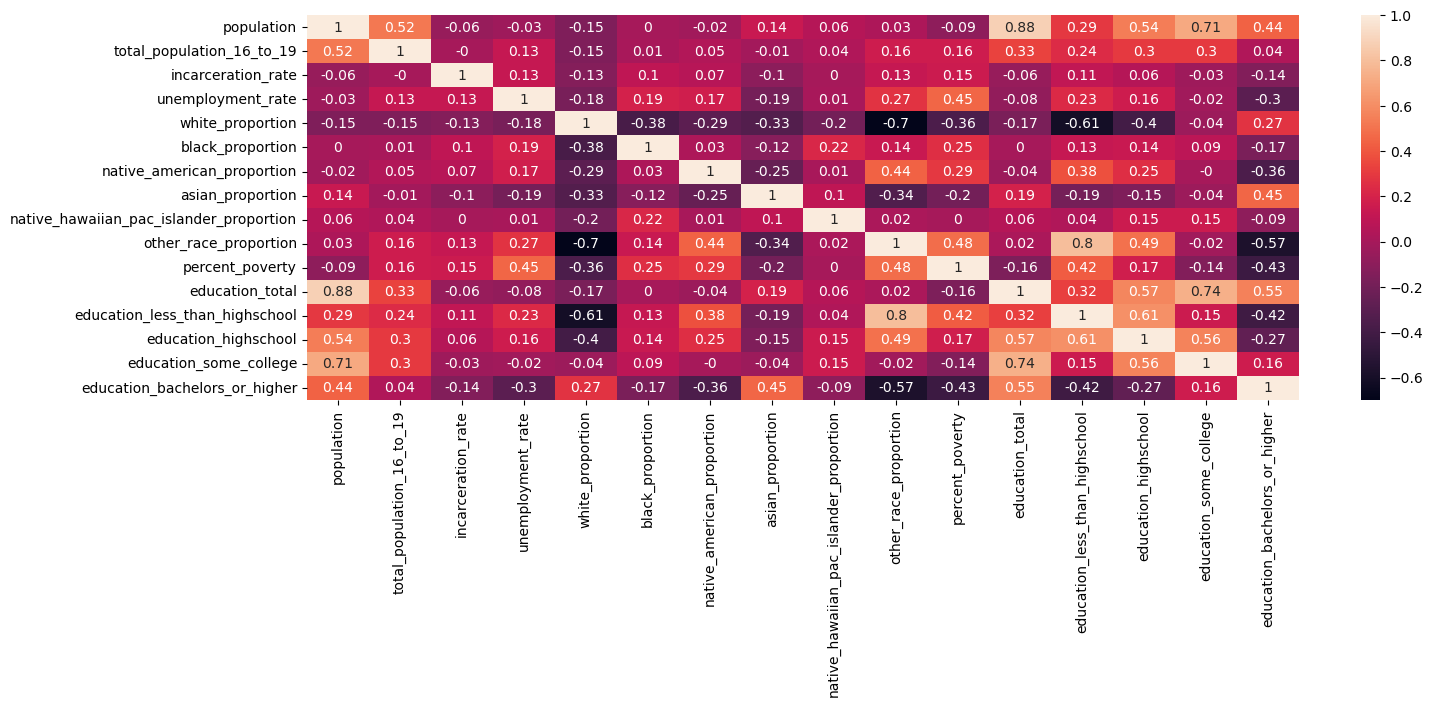

In [11]:
import seaborn as sns
correlation_matrix = predictors.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('incarceration_rate ~ unemployment_rate + C(Area_Type) + population + percent_poverty + C(plurality_race) + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion +  other_race_proportion   + education_total + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19', data = predictors, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/ianduke/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6915.763476,Intercept
1,1.223349,C(Area_Type)[T.Urban]
2,684.216906,C(plurality_race)[T.Asian]
3,120.548228,C(plurality_race)[T.Black or African American]
4,1162.153641,C(plurality_race)[T.Some Other Race]
5,1448.874315,C(plurality_race)[T.White]
6,1.308042,unemployment_rate
7,6.042376,population
8,1.767698,percent_poverty
9,45.540319,white_proportion


## Yikes! We have perfect correlations between education columns. This makes sense. Let's remove the education_total column

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('incarceration_rate ~ unemployment_rate + C(Area_Type) + population + percent_poverty + C(plurality_race) + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion +  other_race_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19', data = predictors, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,VIF Factor,features
0,6915.763476,Intercept
1,1.223349,C(Area_Type)[T.Urban]
2,684.216906,C(plurality_race)[T.Asian]
3,120.548228,C(plurality_race)[T.Black or African American]
4,1162.153641,C(plurality_race)[T.Some Other Race]
5,1448.874315,C(plurality_race)[T.White]
6,1.308042,unemployment_rate
7,6.042376,population
8,1.767698,percent_poverty
9,45.540319,white_proportion


# Now let's turn our attention to racial proportions. It's looking like we need to remove some kind of category. To make things cleaner, let's remove the catch all "other"

In [14]:
y, X = dmatrices('incarceration_rate ~ unemployment_rate + C(plurality_race) + C(Area_Type) + population + percent_poverty +  white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19', data = predictors, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,VIF Factor,features
0,6388.841488,Intercept
1,683.419992,C(plurality_race)[T.Asian]
2,120.461914,C(plurality_race)[T.Black or African American]
3,1160.056895,C(plurality_race)[T.Some Other Race]
4,1447.883769,C(plurality_race)[T.White]
5,1.222075,C(Area_Type)[T.Urban]
6,1.301173,unemployment_rate
7,6.041788,population
8,1.726289,percent_poverty
9,7.802414,white_proportion


# Hmmm, it looks like including both racial proportions and racial pluralities in one model introduces far too much multicollinearity. Let's calculate a GVIF score for plurality_race

In [15]:
def calculate_GVIF(all_vars, var):

    """Calculate GVIF between one non-numeric variarble (var) and other variables (all_vars)"""

    # Create correlation matrix (A) of non-numeric variable (var)
    A = pd.get_dummies(all_vars[var], drop_first = True).corr().to_numpy()
    
    # Seperate non-numeric variable name (var) from other variable names
    columns = list(all_vars.columns)
    columns.remove(var)

    # Create correlation matrix (B) of other variables
    B = pd.get_dummies(all_vars[columns], drop_first = True).corr().to_numpy()

    # Create correlation matrix (C) of all variables
    C = pd.get_dummies(all_vars, drop_first = True).corr().to_numpy()

    # Calculate GVIF
    GVIF = (np.linalg.det(A)*np.linalg.det(B)) / np.linalg.det(C)

    return GVIF

In [16]:
all_vars = predictors

var = 'plurality_race'

x = calculate_GVIF(predictors, var)

print(f'GVIF for race_plurality = {x}')

GVIF for race_plurality = 40.42780856587475


# Oh no! GVIFs show that the race plurality predictor introduces far too much multicolinearity. Let's calculate VIFs without this:

In [49]:
y, X = dmatrices('incarceration_rate ~ unemployment_rate + C(Area_Type) + population + percent_poverty +  white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19', data = predictors, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,VIF Factor,features
0,96.139142,Intercept
1,1.202601,C(Area_Type)[T.Urban]
2,1.298417,unemployment_rate
3,6.017656,population
4,1.703425,percent_poverty
5,4.596294,white_proportion
6,1.646150,black_proportion
7,1.435877,native_american_proportion
8,2.858378,asian_proportion
9,1.132574,native_hawaiian_pac_islander_proportion


### Interpretation: Our VIFs are now all less than 10, which means the level of multicollinearity in the system is acceptable!

| VIF/GVIF Factor    | Features                                      |
|--------------------|-----------------------------------------------|
| 6915.763476        | Intercept                                     |
| 1.223349           | C(Area_Type)[T.Urban]                         |
| 684.216906         | C(plurality_race)[T.Asian]                    |
| 120.548228         | C(plurality_race)[T.Black or African American]|
| 1162.153641        | C(plurality_race)[T.Some Other Race]          |
| 1448.874315        | C(plurality_race)[T.White]                    |
| 1.308042           | unemployment_rate                             |
| 6.042376           | population                                    |
| 1.767698           | percent_poverty                               |
| 45.540319          | white_proportion                              |
| 7.068499           | black_proportion                              |
| 2.489335           | native_american_proportion                    |
| 25.802133          | asian_proportion                              |
| 1.182019           | native_hawaiian_pac_islander_proportion       |
| 43.208835          | other_race_proportion                         |
| inf                | education_total                               |
| inf                | education_less_than_highschool                |
| inf                | education_highschool                          |
| inf                | education_some_college                        |
| inf                | education_bachelors_or_higher                 |
| 1.598651           | total_population_16_to_19                     |
| 40.42780856587475  | GVIF for race                                 |


| VIF Factor       | Features                                      |
|------------------|-----------------------------------------------|
| 96.139142        | Intercept                                     |
| 1.202601         | C(Area_Type)[T.Urban]                         |
| 1.298417         | unemployment_rate                             |
| 6.017656         | population                                    |
| 1.703425         | percent_poverty                               |
| 4.596294         | white_proportion                              |
| 1.646150         | black_proportion                              |
| 1.435877         | native_american_proportion                    |
| 2.858378         | asian_proportion                              |
| 1.132574         | native_hawaiian_pac_islander_proportion       |
| 3.547390         | education_less_than_highschool                |
| 3.125224         | education_highschool                          |
| 2.773845         | education_some_college                        |
| 3.829052         | education_bachelors_or_higher                 |
| 1.593271         | total_population_16_to_19                     |


In [21]:
model = smf.ols('incarceration_rate ~ unemployment_rate + Area_Type + population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' 
, data = predictors).fit()
model.summary() 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     incarceration_rate   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     27.58
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.09e-71
Time:                        13:34:59   Log-Likelihood:                -59551.
No. Observations:                7322   AIC:                         1.191e+05
Df Residuals:                    7307   BIC:                         1.192e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 911.4848     94.516      9.644      0.000     726.206    1096.763
Area_Type[T.Urban]                        -65.4679     50.520     -1.296      0.195    -164.501      33.565
unemployment_rate                          12.3978      2.744      4.518      0.000       7.018      17.777
population                                 -0.0195      0.014     -1.405      0.160      -0.047       0.008
percent_poverty                             4.4470      1.265      3.516      0.000       1.968       6.926
white_proportion                         -856.3576     91.806     -9.328      0.000   -1036.324    -676.391
black_proportion                         -119.6014    148.434     -0.806      0.420    -410.575     171.372
native_american_proportion              -1645.0355    652.289     -2.522      0.012   -2923.711    -366.360
asian_proportion                         -855.9934     98.318     -8.706      0.000   -1048.724    -663.262
native_hawaiian_pac_islander_proportion -2488.6838   1699.621     -1.464      0.143   -5820.431     843.064
education_less_than_highschool             -0.1611      0.053     -3.060      0.002      -0.264      -0.058
education_highschool                       -0.0172      0.057     -0.304      0.761      -0.128       0.094
education_some_college                      0.0359      0.045      0.805      0.421      -0.052       0.123
education_bachelors_or_higher               0.0106      0.028      0.382      0.703      -0.044       0.065
total_population_16_to_19                  -0.0742      0.058     -1.286      0.198      -0.187       0.039
==============================================================================
Omnibus:                    27066.208   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13349487520.526
Skew:                          79.332   Prob(JB):                         0.00
Kurtosis:                    6615.993   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now let's check for influential points

Text(0.5, 1.0, 'Fitted Values vs Residuals')

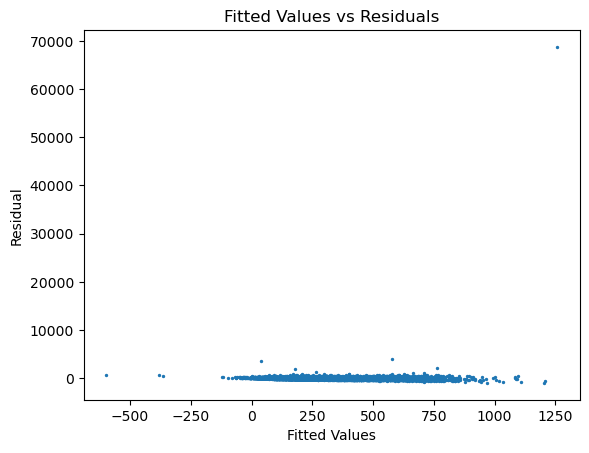

In [22]:
p1 = model.fittedvalues
res1 = model.resid
plt.scatter(p1, res1, s = 2)
plt.xlabel('Fitted Values')
plt.ylabel("Residual")
plt.title("Fitted Values vs Residuals")

# Well that's an outlier if I've ever seen one (top right)!!! There may be other outliers, so let's calculate some external studentized residuals: 

In [23]:
#Create external residual plot
#lets first create our object for analysis
infl = model.get_influence()
influentual_external_studentized_residuals = infl.resid_studentized_external
n=len(predictors)
p=15
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

# Create a list of tuples
influential_data = list(zip(predictors.index[atyp_stud], reg_studs[atyp_stud], model.resid[atyp_stud]))

# Print the list of tuples
influential_points = [item for item in influential_data]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [24]:
influential_points

[(374, 2.212841901344117, 1821.780104270341),
 (2233, 418.4787879764602, 68743.01274307846),
 (3613, 2.460822295828447, 2015.8460114165562),
 (3615, 4.742918431143947, 3880.0613543738446),
 (3628, 4.23029602029579, 3479.2628954239563)]

# Alright, looks like we have five data points (index 374, 2233, 3613, 3615, and 3628) that are outliers. We CANNOT simply delete these outliers, so we need to report them and present analysis with and without them. To be extra sure, let's also calculate some Cook's distances:

In [25]:
#lets find Cook's distance
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d
atyp_cook = np.abs(reg_cook) >= 4/n

cook_points = list(zip(predictors.index[atyp_cook],reg_cook[atyp_cook]))

cook_influential_points = [row for row in cook_points]

cook_influential_points

[(374, 0.001066244274380531),
 (415, 0.0011126982974056765),
 (696, 0.0036779512496025743),
 (984, 0.051084198451187196),
 (1005, 0.0006654429462498696),
 (1307, 0.0006607350472098411),
 (1779, 0.001587727415527237),
 (1780, 0.000813311136603563),
 (2233, 4.621540683816744),
 (3613, 0.0053157422342428925),
 (3615, 0.020375829213718957),
 (3618, 0.0011431955771340695),
 (3628, 0.0041281407118073),
 (3810, 0.0007067128880592496),
 (4038, 0.003010974321600774),
 (4815, 0.0006112427996612622),
 (4944, 0.0017159091938993578),
 (5583, 0.001607386891037073),
 (5990, 0.005975558459849085),
 (6233, 0.0008246526925904334)]

# Great to know! Using Cook's, we've determined a larger number of datapoints that are influential. Note how all indices we located using external studentized residuals also show up when we utilize Cooks.

# Next up, let's check for heteroscedasticity:

In [26]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['BP Statistic', 'BP-Test p-value']
print(dict(zip(labels, bp_test)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
{'BP Statistic': 70.72734812781248, 'BP-Test p-value': 1.4246768148324997e-09}


# Our p-value incidates that heteroscedasticity is a problem in our model. But remember those pesky outliers? They may be muddying these results because Breusch-Pagan is very sensitive to outliers. Let's create a model without the outliers and rerun the test...

In [27]:
#lets first create a list of only observations for influential_data and cook_points
studentized_indices = []
for element in influential_data:
    studentized_indices.append(element[0])

cooks_indices = []
for element in cook_points:
    cooks_indices.append(element[0])

#now lets find the intersection
intersection = list(set(studentized_indices) & set(cooks_indices))

sorted_outliers = sorted(intersection)

predictors_outliers_dropped = predictors.drop(sorted_outliers)

In [28]:
#Rerunning Breusch-Pagan test
new_model  = smf.ols('incarceration_rate ~ unemployment_rate +other_race_proportion +  C(plurality_race) + C(Area_Type) + population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' , data = predictors_outliers_dropped).fit()

bp_test = het_breuschpagan(new_model.resid, new_model.model.exog)
labels = ['BP Statistic', 'BP-Test p-value']
print(dict(zip(labels, bp_test)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
{'BP Statistic': 646.7909804182705, 'BP-Test p-value': 6.588390231539586e-125}


# Yikes! Looks like we have unacceptable levels of heteroscedacity. This needs to be remedied via a log transformation on Y

In [29]:
predictors

,population,plurality_race,total_population_16_to_19,incarceration_rate,unemployment_rate,white_proportion,black_proportion,native_american_proportion,asian_proportion,native_hawaiian_pac_islander_proportion,other_race_proportion,Area_Type,percent_poverty,education_total,education_less_than_highschool,education_highschool,education_some_college,education_bachelors_or_higher
0,3038.0,White,65,99.0,1.0,0.615537,0.047400,0.000658,0.177090,0.003621,0.026333,Urban,4.4,1644,24,18,141,1461
1,2001.0,White,22,50.0,7.9,0.710145,0.019990,0.001499,0.103448,0.001999,0.020490,Urban,5.8,1174,18,46,95,1015
2,5504.0,White,202,18.0,3.4,0.620094,0.101926,0.004724,0.100654,0.004906,0.034702,Urban,5.1,3193,82,87,463,2561
3,4112.0,White,99,146.0,2.5,0.672422,0.070282,0.002918,0.097033,0.001946,0.029669,Urban,9.4,2705,78,165,362,2100
4,3644.0,White,111,410.0,6.4,0.537047,0.171515,0.006586,0.084248,0.001372,0.046103,Urban,9.8,2409,30,293,294,1792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,2738.0,White,228,219.0,1.6,0.339664,0.011322,0.016801,0.167275,0.007670,0.254565,Urban,13.0,1370,164,247,616,343
7353,1653.0,White,35,241.0,0.0,0.410163,0.017544,0.008469,0.128252,0.006050,0.196007,Urban,3.1,837,10,198,195,434
7354,1361.0,White,102,293.0,5.0,0.396032,0.005878,0.047024,0.017634,0.001470,0.351212,Urban,14.9,877,152,177,438,110
7355,3600.0,White,162,744.0,9.2,0.465000,0.033333,0.021944,0.134722,0.004444,0.175833,Urban,39.4,2398,382,690,892,434


In [30]:
# Assuming df is your DataFrame and 'Y' is your dependent variable
predictors['log_incarceration_rate'] = np.log(predictors['incarceration_rate'] + 1)
predictors_outliers_dropped['log_incarceration_rate'] = np.log(predictors_outliers_dropped['incarceration_rate'] + 1)

In [31]:
new_log_model  = smf.ols('log_incarceration_rate ~ unemployment_rate + C(Area_Type) + population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' , data = predictors_outliers_dropped).fit()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [32]:
bp_test = het_breuschpagan(new_log_model.resid, new_log_model.model.exog)
labels = ['BP Statistic', 'BP-Test p-value']
print(dict(zip(labels, bp_test)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
{'BP Statistic': 296.9470971139546, 'BP-Test p-value': 5.118085284911252e-55}


In [33]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
predictors_outliers_dropped['boxcox_incarceration_rate'], lambda_value = boxcox(predictors_outliers_dropped['incarceration_rate'] + 1)

predictors['boxcox_incarceration_rate'], lambda_value = boxcox(predictors['incarceration_rate'] + 1)



In [34]:
#testing boxcox for model with outliers dropped
new_box_model  = smf.ols('boxcox_incarceration_rate ~ unemployment_rate + C(Area_Type) + population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' , data = predictors_outliers_dropped).fit()

bp_test = het_breuschpagan(new_box_model.resid, new_box_model.model.exog)
labels = ['BP Statistic', 'BP-Test p-value']
print(dict(zip(labels, bp_test)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
{'BP Statistic': 414.76691811251436, 'BP-Test p-value': 9.783787217557115e-80}


In [35]:
#testing boxcox for full model
box_model  = smf.ols('boxcox_incarceration_rate ~ unemployment_rate+ C(Area_Type) + population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' , data = predictors).fit()

bp_test = het_breuschpagan(new_box_model.resid, new_box_model.model.exog)
labels = ['BP Statistic', 'BP-Test p-value']
print(dict(zip(labels, bp_test)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
{'BP Statistic': 414.76691811251436, 'BP-Test p-value': 9.783787217557115e-80}


# Oh no! We still have unacceptable levels of heteroscedasticity even after log and boxcox transformations. For this reason, let's analyze our model using robust standard error instead of t-tests

In [36]:
#results with outliers dropped
robust_results = new_box_model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     boxcox_incarceration_rate   R-squared:                       0.507
Model:                                   OLS   Adj. R-squared:                  0.506
Method:                        Least Squares   F-statistic:                     531.3
Date:                       Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                               13:35:21   Log-Likelihood:                -21414.
No. Observations:                       7317   AIC:                         4.286e+04
Df Residuals:                           7302   BIC:                         4.296e+04
Df Model:                                 14                                         
Covariance Type:                         HC1                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  24.8221      0.713     34.814      0.000      23.424      26.220
C(Area_Type)[T.Urban]                      -0.2186      0.382     -0.571      0.568      -0.968       0.531
unemployment_rate                           0.0757      0.018      4.098      0.000       0.039       0.112
population                              -5.152e-05   8.04e-05     -0.641      0.522      -0.000       0.000
percent_poverty                             0.0905      0.009     10.126      0.000       0.073       0.108
white_proportion                          -10.3112      0.641    -16.078      0.000     -11.568      -9.054
black_proportion                           10.3500      1.035     10.002      0.000       8.321      12.378
native_american_proportion                 10.3262      8.197      1.260      0.208      -5.741      26.394
asian_proportion                          -12.6184      0.640    -19.715      0.000     -13.873     -11.364
native_hawaiian_pac_islander_proportion   -52.2496     11.684     -4.472      0.000     -75.154     -29.345
education_less_than_highschool              0.0003      0.000      0.929      0.353      -0.000       0.001
education_highschool                        0.0016      0.000      5.281      0.000       0.001       0.002
education_some_college                      0.0004      0.000      1.718      0.086   -5.86e-05       0.001
education_bachelors_or_higher              -0.0013      0.000     -8.047      0.000      -0.002      -0.001
total_population_16_to_19                  -0.0021      0.000     -4.989      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      540.990   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.804
Skew:                          -0.382   Prob(JB):                         0.00
Kurtosis:                       5.176   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#results without outliers dropped
robust_results = model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     incarceration_rate   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     314.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:35:21   Log-Likelihood:                -59551.
No. Observations:                7322   AIC:                         1.191e+05
Df Residuals:                    7307   BIC:                         1.192e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 911.4848    450.691      2.022      0.043      28.000    1794.969
Area_Type[T.Urban]                        -65.4679     50.090     -1.307      0.191    -163.659      32.723
unemployment_rate                          12.3978     11.215      1.105      0.269      -9.587      34.383
population                                 -0.0195      0.018     -1.062      0.288      -0.056       0.017
percent_poverty                             4.4470      0.830      5.356      0.000       2.819       6.075
white_proportion                         -856.3576    560.300     -1.528      0.126   -1954.707     241.991
black_proportion                         -119.6014    675.781     -0.177      0.860   -1444.327    1205.125
native_american_proportion              -1645.0355   1913.127     -0.860      0.390   -5395.316    2105.245
asian_proportion                         -855.9934    468.268     -1.828      0.068   -1773.934      61.947
native_hawaiian_pac_islander_proportion -2488.6838    835.921     -2.977      0.003   -4127.330    -850.038
education_less_than_highschool             -0.1611      0.182     -0.887      0.375      -0.517       0.195
education_highschool                       -0.0172      0.056     -0.307      0.759      -0.127       0.092
education_some_college                      0.0359      0.063      0.570      0.569      -0.088       0.159
education_bachelors_or_higher               0.0106      0.046      0.228      0.820      -0.080       0.102
total_population_16_to_19                  -0.0742      0.021     -3.599      0.000      -0.115      -0.034
==============================================================================
Omnibus:                    27066.208   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13349487520.526
Skew:                          79.332   Prob(JB):                         0.00
Kurtosis:                    6615.993   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#results with outliers dropped
robust_results = new_model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     incarceration_rate   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     320.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:35:22   Log-Likelihood:                -46992.
No. Observations:                7317   AIC:                         9.402e+04
Df Residuals:                    7297   BIC:                         9.416e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                       -478.0786    211.886     -2.256      0.024    -893.437     -62.721
C(plurality_race)[T.Asian]                       526.3656    198.079      2.657      0.008     138.072     914.659
C(plurality_race)[T.Black or African American]   387.2254    200.495      1.931      0.053      -5.802     780.253
C(plurality_race)[T.Some Other Race]             488.0149    198.246      2.462      0.014      99.395     876.635
C(plurality_race)[T.White]                       484.6121    197.942      2.448      0.014      96.589     872.635
C(Area_Type)[T.Urban]                            -15.3939     12.595     -1.222      0.222     -40.083       9.295
unemployment_rate                                  2.8533      0.664      4.298      0.000       1.552       4.155
other_race_proportion                            638.2609     93.387      6.835      0.000     455.196     821.326
population                                      8.499e-05      0.003      0.030      0.976      -0.006       0.006
percent_poverty                                    2.8983      0.366      7.924      0.000       2.181       3.615
white_proportion                                 200.6974     72.344      2.774      0.006      58.882     342.513
black_proportion                                1126.4967     85.734     13.139      0.000     958.433    1294.561
native_american_proportion                      1035.8161    226.648      4.570      0.000     591.521    1480.111
asian_proportion                                  13.0598     71.733      0.182      0.856    -127.558     153.678
native_hawaiian_pac_islander_proportion        -1456.8394    365.601     -3.985      0.000   -2173.524    -740.155
education_less_than_highschool                    -0.0142      0.013     -1.130      0.259      -0.039       0.010
education_highschool                               0.0298      0.011      2.790      0.005       0.009       0.051
education_some_college                            -0.0119      0.009     -1.382      0.167      -0.029       0.005
education_bachelors_or_higher                     -0.0320      0.005     -6.442      0.000      -0.042      -0.022
total_population_16_to_19                         -0.0554      0.011     -4.991      0.000      -0.077      -0.034
==============================================================================
Omnibus:                     2100.920   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13232.190
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       9.117   Cond. No.                     9.02e+05
===========================================

# Phew! Now that we've overcome the heteroscedasticity drama, lets check normality assumptions. To do this, we start by creating some QQ plots:

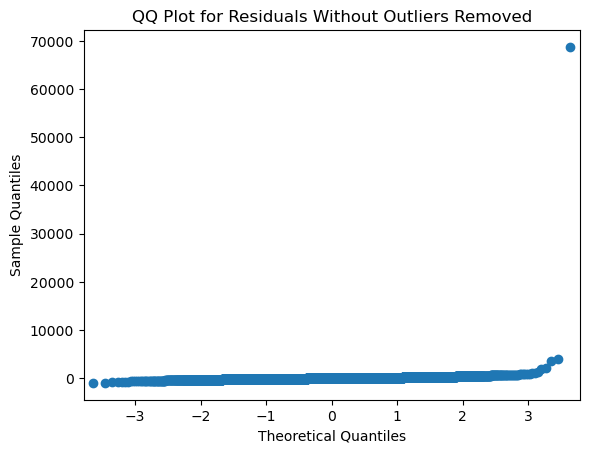

In [39]:
fig = sm.qqplot(model.resid)
plt.title('QQ Plot for Residuals Without Outliers Removed')
plt.show()


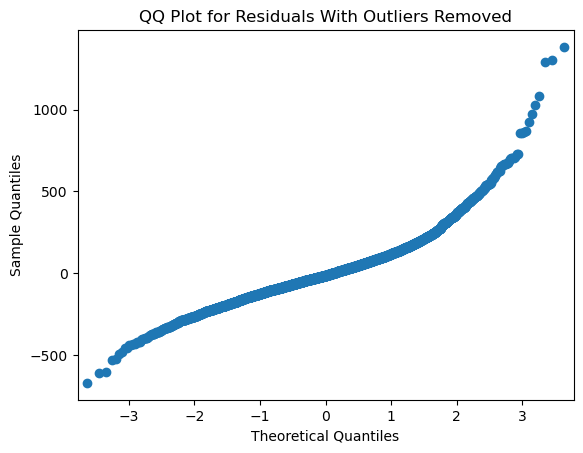

In [40]:
fig = sm.qqplot(new_model.resid)
plt.title('QQ Plot for Residuals With Outliers Removed')
plt.show()


# Wow! Looks like our plots are a lot closer to linear when we remove the outliers... Let's see what they look like with the transformations

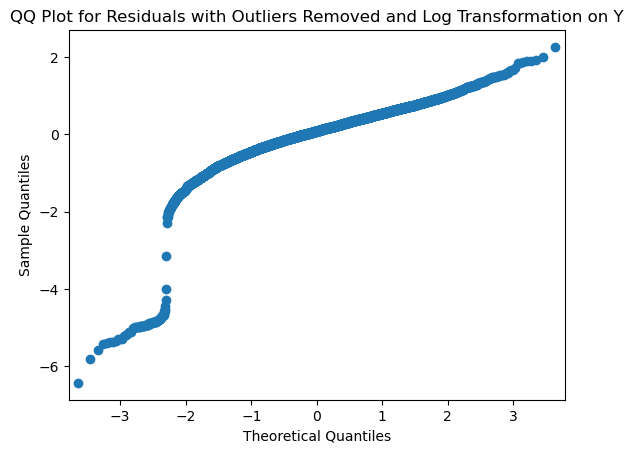

In [41]:
# Assuming you have the rest of your code above this

fig = sm.qqplot(new_log_model.resid)
plt.title('QQ Plot for Residuals with Outliers Removed and Log Transformation on Y')
plt.show()

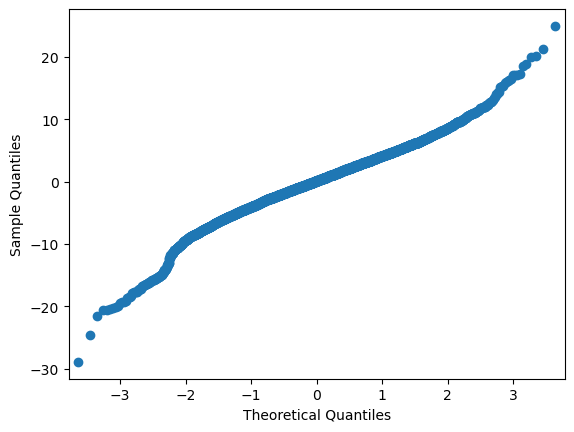

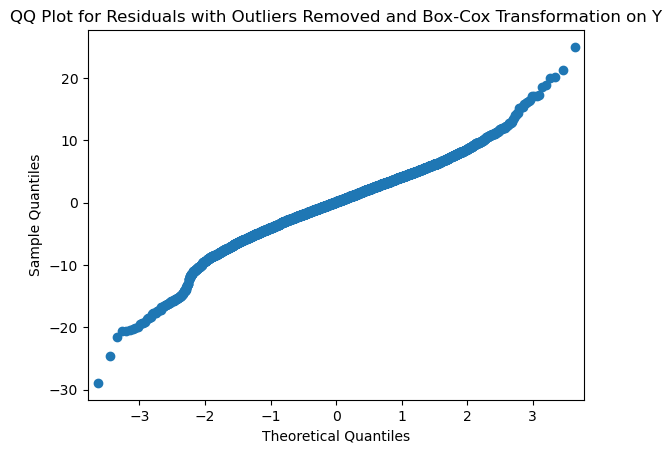

In [42]:
#QQ plot
sm.qqplot(new_box_model.resid)

fig = sm.qqplot(new_box_model.resid)
plt.title('QQ Plot for Residuals with Outliers Removed and Box-Cox Transformation on Y')
plt.show()

# Alright - it looks like our boxcox results get us somewhere closer to a linear relationship. Lets check jaque bera for boxcox transformed models (outliers dropped and regular) 

In [43]:
#results without outliers dropped
robust_results = new_box_model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     boxcox_incarceration_rate   R-squared:                       0.507
Model:                                   OLS   Adj. R-squared:                  0.506
Method:                        Least Squares   F-statistic:                     531.3
Date:                       Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                               13:35:22   Log-Likelihood:                -21414.
No. Observations:                       7317   AIC:                         4.286e+04
Df Residuals:                           7302   BIC:                         4.296e+04
Df Model:                                 14                                         
Covariance Type:                         HC1                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  24.8221      0.713     34.814      0.000      23.424      26.220
C(Area_Type)[T.Urban]                      -0.2186      0.382     -0.571      0.568      -0.968       0.531
unemployment_rate                           0.0757      0.018      4.098      0.000       0.039       0.112
population                              -5.152e-05   8.04e-05     -0.641      0.522      -0.000       0.000
percent_poverty                             0.0905      0.009     10.126      0.000       0.073       0.108
white_proportion                          -10.3112      0.641    -16.078      0.000     -11.568      -9.054
black_proportion                           10.3500      1.035     10.002      0.000       8.321      12.378
native_american_proportion                 10.3262      8.197      1.260      0.208      -5.741      26.394
asian_proportion                          -12.6184      0.640    -19.715      0.000     -13.873     -11.364
native_hawaiian_pac_islander_proportion   -52.2496     11.684     -4.472      0.000     -75.154     -29.345
education_less_than_highschool              0.0003      0.000      0.929      0.353      -0.000       0.001
education_highschool                        0.0016      0.000      5.281      0.000       0.001       0.002
education_some_college                      0.0004      0.000      1.718      0.086   -5.86e-05       0.001
education_bachelors_or_higher              -0.0013      0.000     -8.047      0.000      -0.002      -0.001
total_population_16_to_19                  -0.0021      0.000     -4.989      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      540.990   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.804
Skew:                          -0.382   Prob(JB):                         0.00
Kurtosis:                       5.176   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#results without outliers dropped
robust_results = box_model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     boxcox_incarceration_rate   R-squared:                       0.468
Model:                                   OLS   Adj. R-squared:                  0.467
Method:                        Least Squares   F-statistic:                     474.7
Date:                       Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                               13:35:22   Log-Likelihood:                -17815.
No. Observations:                       7322   AIC:                         3.566e+04
Df Residuals:                           7307   BIC:                         3.576e+04
Df Model:                                 14                                         
Covariance Type:                         HC1                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  16.5202      0.570     28.965      0.000      15.402      17.638
C(Area_Type)[T.Urban]                      -0.0470      0.232     -0.203      0.839      -0.501       0.407
unemployment_rate                           0.0460      0.015      3.054      0.002       0.016       0.075
population                              -5.534e-05    4.9e-05     -1.130      0.258      -0.000    4.06e-05
percent_poverty                             0.0539      0.006      8.743      0.000       0.042       0.066
white_proportion                           -6.2652      0.622    -10.070      0.000      -7.485      -5.046
black_proportion                            4.6945      0.834      5.632      0.000       3.060       6.329
native_american_proportion                  4.5440      4.520      1.005      0.315      -4.317      13.405
asian_proportion                           -7.5156      0.556    -13.507      0.000      -8.606      -6.425
native_hawaiian_pac_islander_proportion   -29.8724      7.171     -4.166      0.000     -43.929     -15.816
education_less_than_highschool          -5.487e-05      0.000     -0.220      0.826      -0.001       0.000
education_highschool                        0.0009      0.000      5.263      0.000       0.001       0.001
education_some_college                      0.0004      0.000      2.921      0.004       0.000       0.001
education_bachelors_or_higher              -0.0007      0.000     -6.869      0.000      -0.001      -0.000
total_population_16_to_19                  -0.0012      0.000     -4.631      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     2866.525   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           401466.278
Skew:                           0.824   Prob(JB):                         0.00
Kurtosis:                      39.238   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#just for fun, let's see results for log model with outliers dropped. Looking at the QQ plot, the JB should be crazy high
robust_results = new_log_model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_incarceration_rate   R-squared:                       0.367
Model:                                OLS   Adj. R-squared:                  0.365
Method:                     Least Squares   F-statistic:                     365.6
Date:                    Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                            13:35:22   Log-Likelihood:                -8119.6
No. Observations:                    7317   AIC:                         1.627e+04
Df Residuals:                        7302   BIC:                         1.637e+04
Df Model:                              14                                         
Covariance Type:                      HC1                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   5.9703      0.115     52.054      0.000       5.745       6.195
C(Area_Type)[T.Urban]                       0.0549      0.070      0.786      0.432      -0.082       0.192
unemployment_rate                           0.0106      0.003      3.685      0.000       0.005       0.016
population                              -9.958e-07   1.21e-05     -0.082      0.934   -2.47e-05    2.27e-05
percent_poverty                             0.0104      0.001      7.254      0.000       0.008       0.013
white_proportion                           -1.4010      0.102    -13.761      0.000      -1.601      -1.201
black_proportion                            0.7085      0.142      4.982      0.000       0.430       0.987
native_american_proportion                  1.6758      1.107      1.514      0.130      -0.494       3.846
asian_proportion                           -1.6527      0.101    -16.345      0.000      -1.851      -1.454
native_hawaiian_pac_islander_proportion    -7.2560      2.228     -3.257      0.001     -11.623      -2.889
education_less_than_highschool          -3.244e-05   5.07e-05     -0.639      0.523      -0.000     6.7e-05
education_highschool                        0.0002   3.99e-05      5.869      0.000       0.000       0.000
education_some_college                      0.0002   3.66e-05      5.556      0.000       0.000       0.000
education_bachelors_or_higher              -0.0002   2.37e-05     -6.504      0.000      -0.000      -0.000
total_population_16_to_19                  -0.0003   9.55e-05     -3.441      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     5489.840   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141913.283
Skew:                          -3.363   Prob(JB):                         0.00
Kurtosis:                      23.500   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Our Prob(JB) is still zero -- indicating a lack of normality :( We'll just need to report this

# Last but not least - let's check for nonlinearity

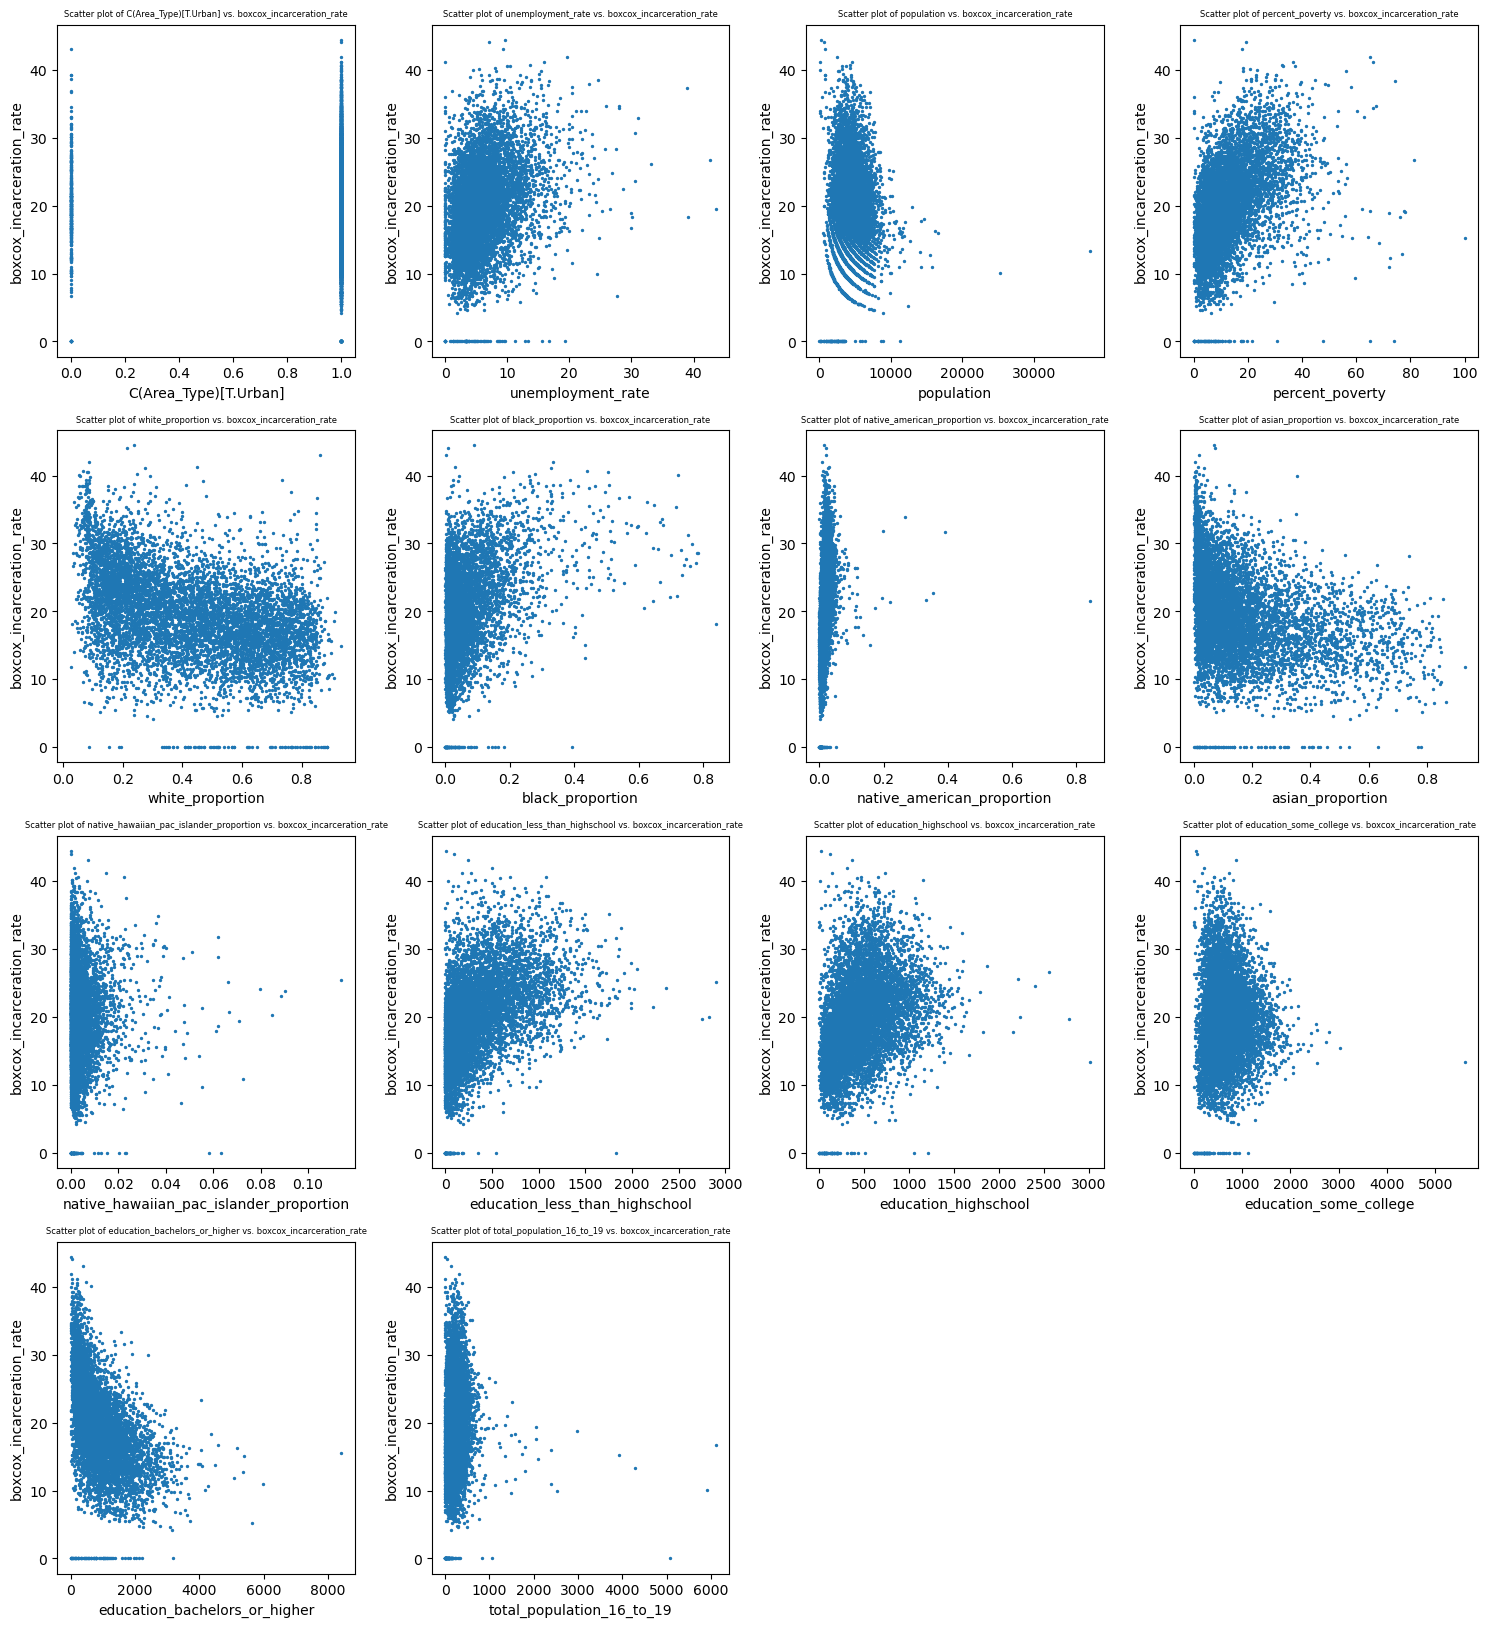

In [46]:
import matplotlib.pyplot as plt

# Extract the predictors and response variable from your model
X = new_box_model.model.exog
Y = new_box_model.model.endog
predictor_names = new_box_model.model.exog_names

# Create scatter plots
plt.figure(figsize=(15, 20))
for idx, col in enumerate(predictor_names):
    if col != 'Intercept':  # We don't want to plot against the intercept
        plt.subplot(5, 4, idx)  # Adjust numbers here based on the number of predictors you have
        plt.scatter(X[:, idx], Y, s=2)
        plt.title(f'Scatter plot of {col} vs. boxcox_incarceration_rate', fontsize = 6)
        plt.xlabel(col)
        plt.ylabel('boxcox_incarceration_rate')
plt.tight_layout()
plt.show()

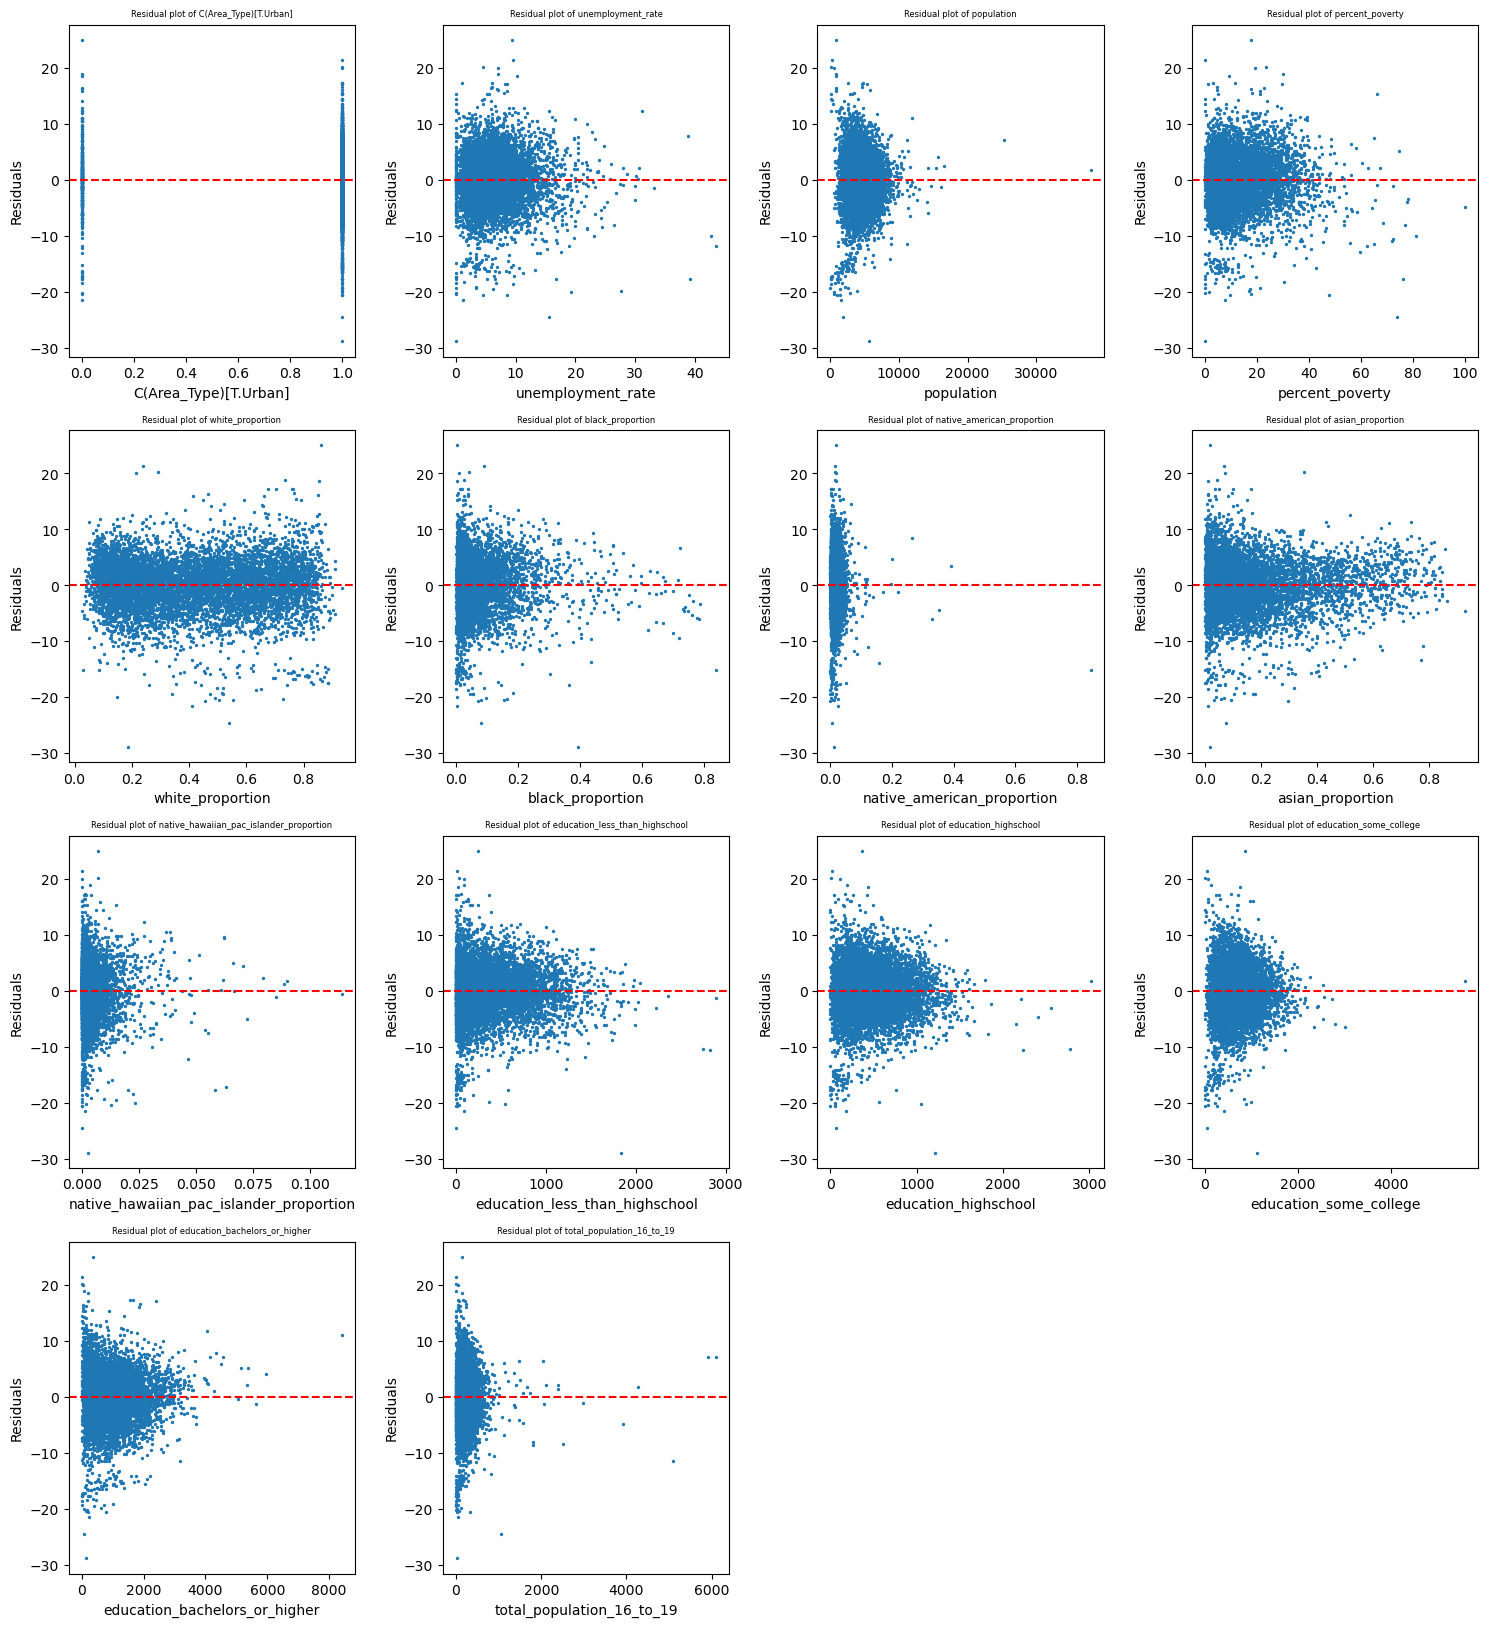

In [47]:
import matplotlib.pyplot as plt

# Extract the predictors and response variable from your model
X = new_box_model.model.exog
Y = new_box_model.model.endog
predictor_names = new_box_model.model.exog_names

# Get predicted values from the model
Y_pred = new_box_model.fittedvalues

# Compute the residuals
residuals = Y - Y_pred

# Create scatter plots for residuals
plt.figure(figsize=(15, 20))
for idx, col in enumerate(predictor_names):
    if col != 'Intercept':  # We don't want to plot against the intercept
        plt.subplot(5, 4, idx)  # Adjust numbers here based on the number of predictors you have
        plt.scatter(X[:, idx], residuals, s=2)
        plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at zero for clarity
        plt.title(f'Residual plot of {col}', fontsize=6)
        plt.xlabel(col)
        plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


# Alright! There are mostly no discernible patterns here that would indicate non-linearity. However, there are some indications that census tracts with incarceration rates of '0' behave differently (AKA a different population).



# There does, however, appear to be a slight pattern in population. Let's try out a log transformation on this predictor

In [77]:
# Apply log transformation to 'population' predictor
predictors_outliers_dropped['log_population'] = np.log(predictors_outliers_dropped['population'])
predictors['log_population'] = np.log(predictors['population'])

box_model_logx  = smf.ols('boxcox_incarceration_rate ~ unemployment_rate + C(Area_Type) + log_population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' , data = predictors).fit()
new_box_model_logx  = smf.ols('boxcox_incarceration_rate ~ unemployment_rate + C(Area_Type) + log_population + percent_poverty + white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion  + education_less_than_highschool + education_highschool + education_some_college + education_bachelors_or_higher + total_population_16_to_19' , data = predictors_outliers_dropped).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


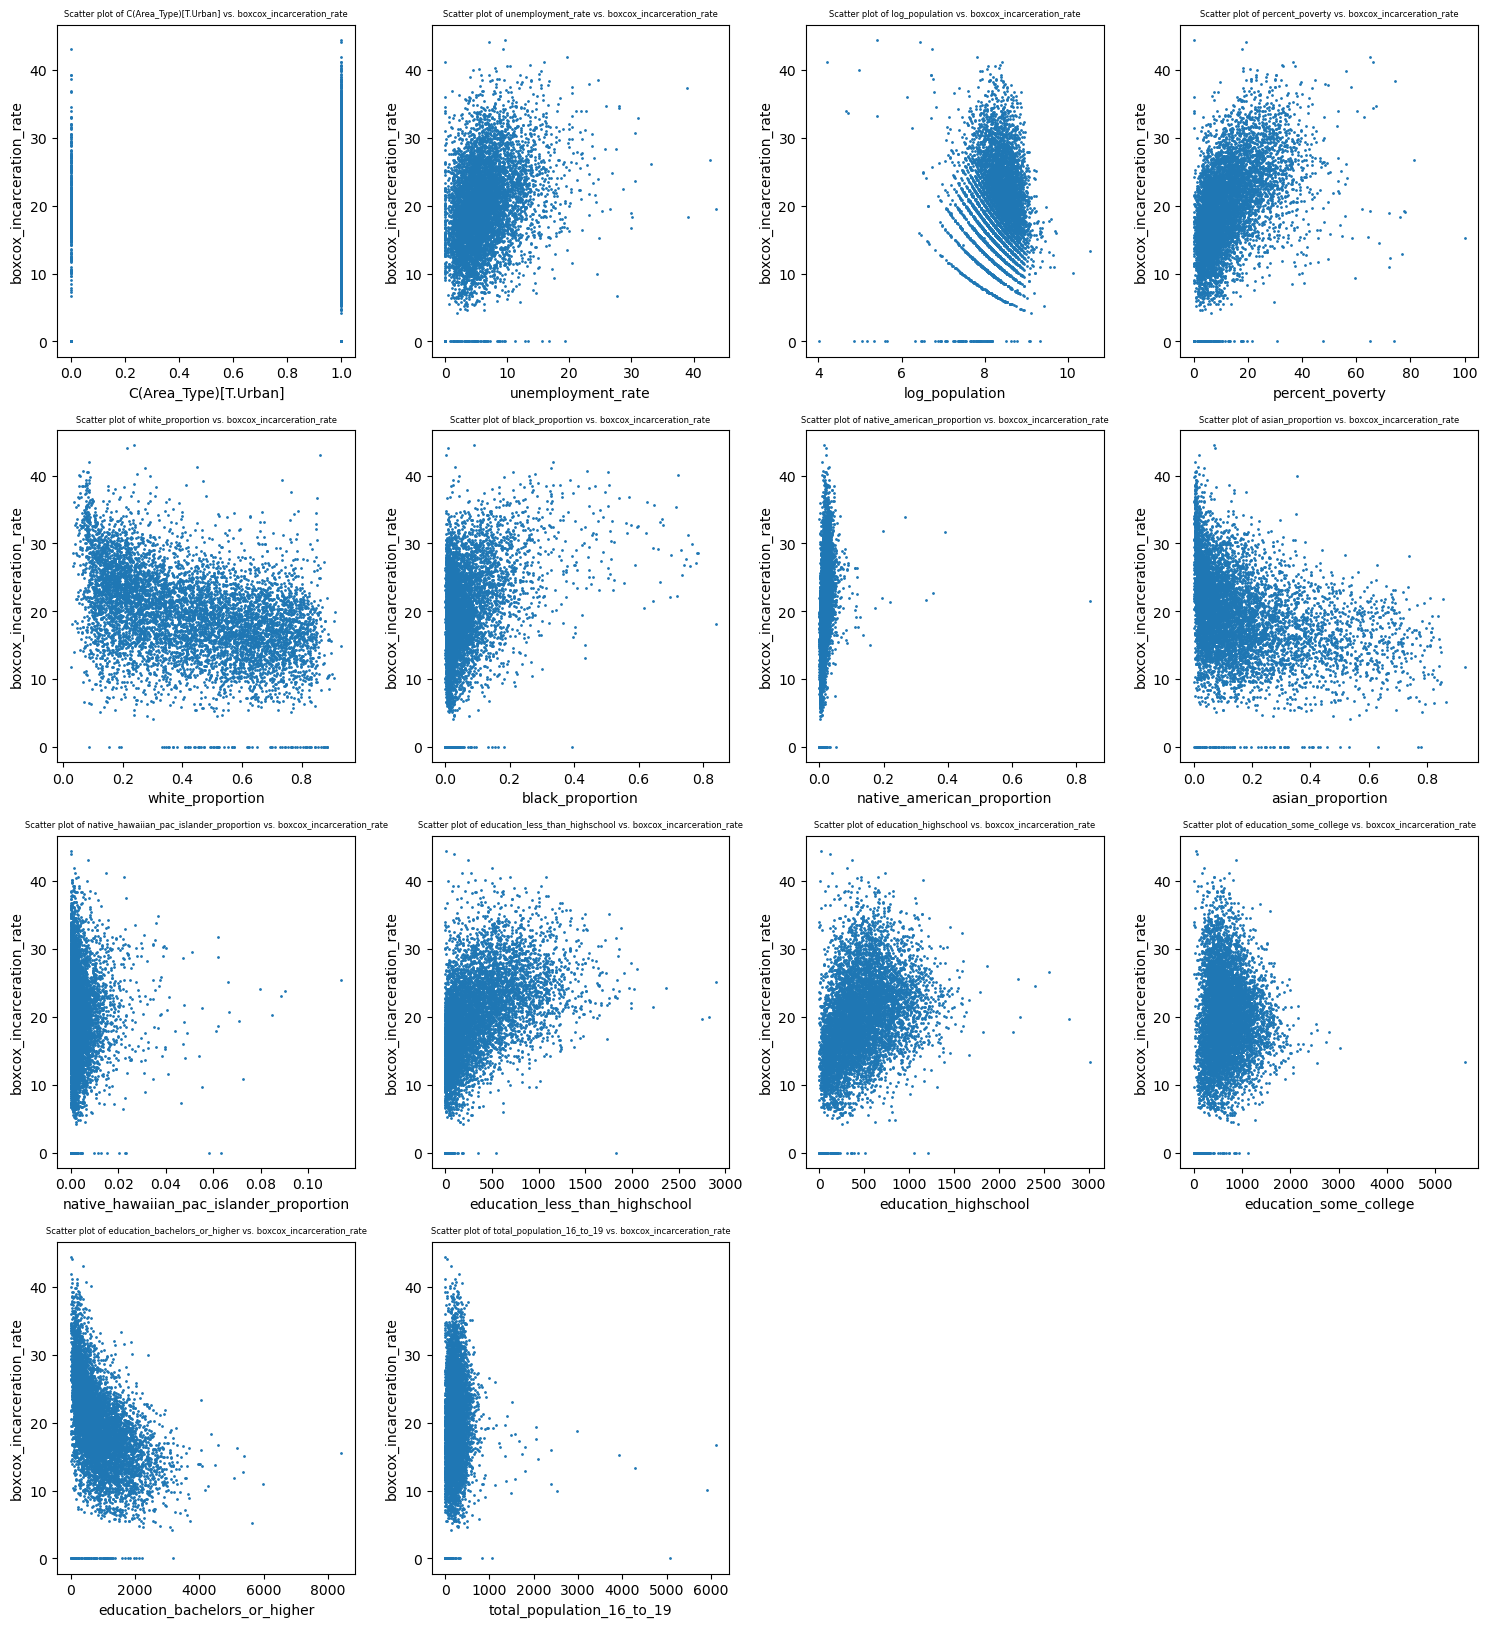

In [80]:
import matplotlib.pyplot as plt

# Extract the predictors and response variable from your model
X = new_box_model_logx.model.exog
Y = new_box_model_logx.model.endog
predictor_names = new_box_model_logx.model.exog_names

#Create scatter plots
plt.figure(figsize=(15, 20))
for idx, col in enumerate(predictor_names):
    if col != 'Intercept':  # We don't want to plot against the intercept
        plt.subplot(5, 4, idx)  # Adjust numbers here based on the number of predictors you have
        plt.scatter(X[:, idx], Y, s=1)
        plt.title(f'Scatter plot of {col} vs. boxcox_incarceration_rate', fontsize = 6)
        plt.xlabel(col)
        plt.ylabel('boxcox_incarceration_rate')
plt.tight_layout()
plt.show()

# Model Problem Diagnosis Summary:

- **Multicollinearity**: Dropped "education_total", "proportion_race_other", and "plurality_race" categories. With these changes, all VIFs < 10
- **Influential Points**: Identified five influential points that are captured by both analysis of external studentized residuals and analysis of Cook's distances.  
    - ***Necessary Action***: Need to report outliers and create two models-- one with residuals and one without residuals .
- **Heteroscedasticity**: Unacceptable levels of heteroscedasticity even after log and boxcox transformations 
    - ***Necessary Action***: Need to analyze model using robust standard error instead of t-tests
- **Normality**: Unacceptable levels of non-normality (p = 0 for JB test). Boxcox transformation gets closest to normality, but still provides p = 0. 
    - ***Necessary Action***: Move forward with analysis and note violation in discussion
- **Linearity**: Looks good enough

# Final analyses using robust standard error (to use with model selection):

In [62]:
robust_results = new_box_model.get_robustcov_results()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     boxcox_incarceration_rate   R-squared:                       0.507
Model:                                   OLS   Adj. R-squared:                  0.506
Method:                        Least Squares   F-statistic:                     531.3
Date:                       Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                               13:42:06   Log-Likelihood:                -21414.
No. Observations:                       7317   AIC:                         4.286e+04
Df Residuals:                           7302   BIC:                         4.296e+04
Df Model:                                 14                                         
Covariance Type:                         HC1                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  24.8221      0.713     34.814      0.000      23.424      26.220
C(Area_Type)[T.Urban]                      -0.2186      0.382     -0.571      0.568      -0.968       0.531
unemployment_rate                           0.0757      0.018      4.098      0.000       0.039       0.112
population                              -5.152e-05   8.04e-05     -0.641      0.522      -0.000       0.000
percent_poverty                             0.0905      0.009     10.126      0.000       0.073       0.108
white_proportion                          -10.3112      0.641    -16.078      0.000     -11.568      -9.054
black_proportion                           10.3500      1.035     10.002      0.000       8.321      12.378
native_american_proportion                 10.3262      8.197      1.260      0.208      -5.741      26.394
asian_proportion                          -12.6184      0.640    -19.715      0.000     -13.873     -11.364
native_hawaiian_pac_islander_proportion   -52.2496     11.684     -4.472      0.000     -75.154     -29.345
education_less_than_highschool              0.0003      0.000      0.929      0.353      -0.000       0.001
education_highschool                        0.0016      0.000      5.281      0.000       0.001       0.002
education_some_college                      0.0004      0.000      1.718      0.086   -5.86e-05       0.001
education_bachelors_or_higher              -0.0013      0.000     -8.047      0.000      -0.002      -0.001
total_population_16_to_19                  -0.0021      0.000     -4.989      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      540.990   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.804
Skew:                          -0.382   Prob(JB):                         0.00
Kurtosis:                       5.176   Cond. No.                     8.61e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
test_model  = smf.ols('boxcox_incarceration_rate ~ white_proportion + black_proportion + native_american_proportion + asian_proportion + native_hawaiian_pac_islander_proportion' , data = predictors_outliers_dropped).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [82]:
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     boxcox_incarceration_rate   R-squared:                       0.462
Model:                                   OLS   Adj. R-squared:                  0.462
Method:                        Least Squares   F-statistic:                     1257.
Date:                       Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                               14:51:20   Log-Likelihood:                -21729.
No. Observations:                       7317   AIC:                         4.347e+04
Df Residuals:                           7311   BIC:                         4.351e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  28.3061      0.244    116.095      0.000      27.828      28.784
white_proportion                          -15.0496      0.326    -46.153      0.000     -15.689     -14.410
black_proportion                            9.8344      0.775     12.683      0.000       8.314      11.354
native_american_proportion                 21.7762      3.610      6.032      0.000      14.699      28.853
asian_proportion                          -18.9330      0.406    -46.667      0.000     -19.728     -18.138
native_hawaiian_pac_islander_proportion   -43.2315      9.484     -4.558      0.000     -61.824     -24.639
==============================================================================
Omnibus:                      360.312   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1160.316
Skew:                          -0.168   Prob(JB):                    1.10e-252
Kurtosis:                       4.922   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""